In [1]:
#charger le fichier csv

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r"Student_Performance.csv")

In [7]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


# Valeurs manqunates

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [15]:
df.isna()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
9995,False,False,False,False,False,False
9996,False,False,False,False,False,False
9997,False,False,False,False,False,False
9998,False,False,False,False,False,False


In [16]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

# Valeurs dupliquées

In [23]:
(df[df.duplicated()])

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
915,9,52,No,5,9,48.0
1477,7,61,Yes,6,8,54.0
1601,5,99,No,7,5,89.0
1786,2,62,Yes,9,4,40.0
2026,5,87,Yes,6,7,74.0
...,...,...,...,...,...,...
9644,4,91,Yes,4,3,71.0
9940,8,95,No,5,2,90.0
9954,6,97,No,8,7,92.0
9966,1,41,No,7,3,12.0


In [56]:
condition = (df['Hours Studied'] == 9) & (df['Previous Scores'] == 52) & (df['Extracurricular Activities']=='No') & (df['Sleep Hours']==5)

In [57]:
df[condition]

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
202,9,52,No,5,9,48.0
915,9,52,No,5,9,48.0


On remarque qu'il y a 127 lignes dupliquées , mais c'est pas un probleme car il peut y avoir deux etudiants ayant ls memes caracteristiques .

# Valeurs categrorielle --> valeurs numeriques

In [58]:
# rendre Yes : 1  et No : 0

In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
encoder = LabelEncoder()

In [61]:
extra_activ=encoder.fit_transform(df['Extracurricular Activities'])

In [72]:
extra_activ

array([1, 0, 1, ..., 1, 1, 0])

In [74]:
encoder.classes_

array(['No', 'Yes'], dtype=object)

In [82]:
for i in encoder.classes_:
    print(i,' : ',encoder.transform([i]))

No  :  [0]
Yes  :  [1]


In [83]:
df['Extracurricular Activities']= extra_activ

In [84]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


# Afficher quelques statistiques

Afficher un diagramme circulaire pour voir le pourcentage des personnes pratiquants les activités extrascolaires et celles qui ne le font pas

In [86]:
import matplotlib.pyplot as plt

In [88]:
plt.figure(figsize=(6, 6))

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

In [105]:
count = [df[df['Extracurricular Activities']==i].shape[0] for i in df['Extracurricular Activities'].unique()]

In [110]:
count

[4948, 5052]

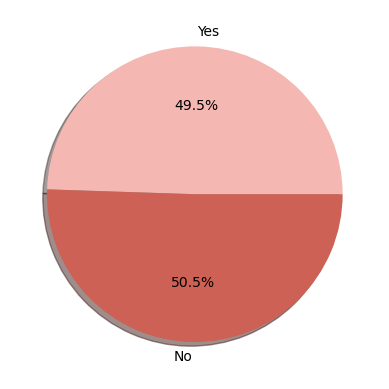

In [114]:
plt.pie(count,labels=['Yes','No'],autopct = "%1.1f%%",shadow = True,colors=['#f5b7b1','#cd6155'])
plt.show()

On remarque que le pourcentage d'etudiants pratiquants les activites extrascorlaire > ceux non

In [115]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [116]:
df.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


# Afficher countplot pour Sleep Hours

<Axes: xlabel='Sleep Hours', ylabel='count'>

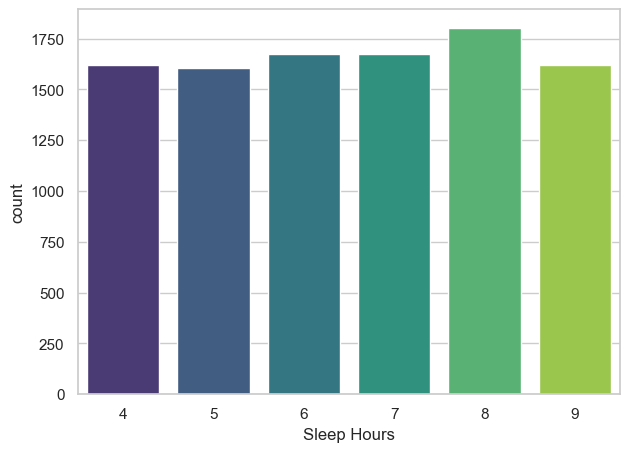

In [137]:
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.figure(figsize=(7, 5))
sns.countplot(x="Sleep Hours",data=df, palette="viridis")


La plupart dorment 8 heures

# Diagramme a barres

In [138]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


calculer la somme des previous scores pour chaque valeur de "Hours studied"

In [145]:
df_groupby= pd.concat([df['Hours Studied'],df['Previous Scores']],axis=1)

In [146]:
df_groupby

,Hours Studied,Previous Scores
0,7,99
1,4,82
2,8,51
3,5,52
4,7,75
...,...,...
9995,1,49
9996,7,64
9997,6,83
9998,9,97


In [164]:
somme = df_groupby.groupby(df_groupby['Hours Studied']).sum().reset_index()

In [165]:
somme

,Hours Studied,Previous Scores
0,1,80227
1,2,75152
2,3,77982
3,4,75748
4,5,76277
5,6,79172
6,7,77537
7,8,76112
8,9,76250


In [166]:
plt.figure(figsize=(7,6))

<Figure size 700x600 with 0 Axes>

<Figure size 700x600 with 0 Axes>

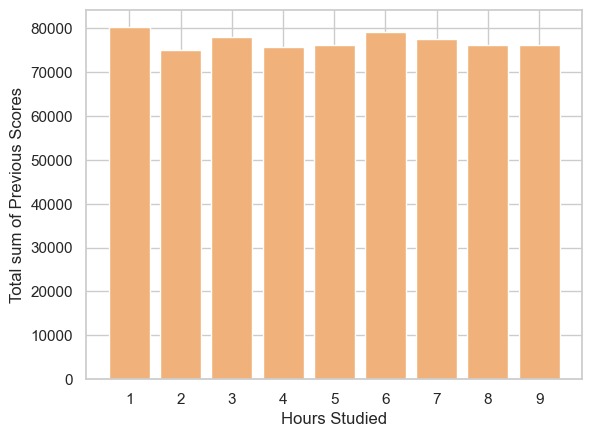

In [172]:
import numpy as np
plt.bar(somme['Hours Studied'], somme['Previous Scores'], color='#f0b27a')
plt.xlabel('Hours Studied')
plt.ylabel('Total sum of Previous Scores')
plt.xticks(np.arange(1,10,1))

# Affichage du graphique
plt.show()

# Boxplot Previous scores

<Axes: xlabel='Previous Scores'>

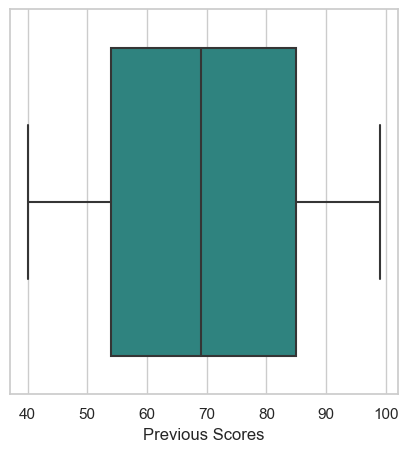

In [188]:
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.figure(figsize=(5, 5))
sns.boxplot(x="Previous Scores",data=df, palette="viridis")

plus de 50% d'etudiants ont un score de plus de 68

# Diagramme a barres 

### Esque les activités extra scolaires affectent elles les resultats des etudiants (Les scores finales) ????

In [182]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [183]:
df_group=pd.concat([df['Extracurricular Activities'],df['Previous Scores']],axis=1)

In [184]:
df_group

,Extracurricular Activities,Previous Scores
0,1,99
1,0,82
2,1,51
3,1,52
4,0,75
...,...,...
9995,1,49
9996,1,64
9997,1,83
9998,1,97


In [190]:
sum = df_group.groupby(df_group['Extracurricular Activities']).sum().reset_index()

In [191]:
sum

,Extracurricular Activities,Previous Scores
0,0,350114
1,1,344343


In [197]:
plt.figure(figsize=(4,7))

<Figure size 400x700 with 0 Axes>

<Figure size 400x700 with 0 Axes>

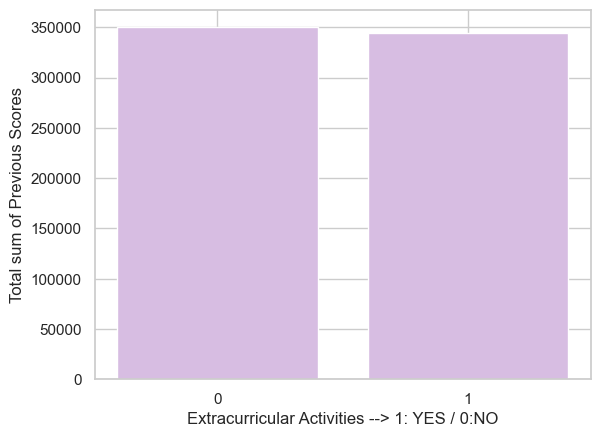

In [198]:
plt.bar(sum['Extracurricular Activities'], sum['Previous Scores'], color='#d7bde2')
plt.xlabel('Extracurricular Activities --> 1: YES / 0:NO')
plt.ylabel('Total sum of Previous Scores')
plt.xticks(np.arange(0,2,1))

# Affichage du graphique
plt.show()

Les personnes pratiquant les activités extra scolaire ont presque le meme score que ceux non , du coup ca n affecte pas

# C'est le moment d'appliquer la regression linéaire